In [1]:
import os.path as op

In [2]:
import AFQ.data as afd
import nibabel as nib

/Users/arokem/.virtualenvs/afq/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
#afd.fetch_hcp(['992774', '994273'])

In [4]:
from AFQ import api

In [5]:
base_dir = op.join(op.expanduser('~'), 'AFQ_data', 'HCP_copy')

In [6]:
myafq = api.AFQ(preproc_path=base_dir, sub_prefix='sub', b0_threshold=15, n_seeds=1000, random_seeds=True, bundle_list=["SLF", "ARC", "CST", "FP"])

Dataset is already in place. If you want to fetch it again please first remove the folder /Users/arokem/AFQ_data/templates 


In [7]:
myafq.bundle_dict

{'SLF_R': {'ROIs': [<nibabel.nifti1.Nifti1Image at 0x116451160>,
  'rules': [True, True, False],
  'prob_map': <nibabel.nifti1.Nifti1Image at 0x116451ac8>,
  'cross_midline': False,
  'uid': 1},
 'SLF_L': {'ROIs': [<nibabel.nifti1.Nifti1Image at 0x116449d30>,
  'rules': [True, True, False],
  'prob_map': <nibabel.nifti1.Nifti1Image at 0x116451940>,
  'cross_midline': False,
  'uid': 2},
 'ARC_R': {'ROIs': [<nibabel.nifti1.Nifti1Image at 0x116451160>,
  'rules': [True, True],
  'prob_map': <nibabel.nifti1.Nifti1Image at 0x116459748>,
  'cross_midline': False,
  'uid': 3},
 'ARC_L': {'ROIs': [<nibabel.nifti1.Nifti1Image at 0x116449d30>,
  'rules': [True, True],
  'prob_map': <nibabel.nifti1.Nifti1Image at 0x1164595c0>,
  'cross_midline': False,
  'uid': 4},
 'CST_R': {'ROIs': [<nibabel.nifti1.Nifti1Image at 0x1163bd208>,
  'rules': [True, True],
  'prob_map': <nibabel.nifti1.Nifti1Image at 0x1163bd828>,
  'cross_midline': False,
  'uid': 5},
 'CST_L': {'ROIs': [<nibabel.nifti1.Nifti1Imag

In [8]:
import time

In [9]:
t1 = time.time()

In [10]:
bb = myafq.bundles

Data size is approximately 70MB
Dataset is already in place. If you want to fetch it again please first remove the folder /Users/arokem/.dipy/mni_template 


/Users/arokem/.virtualenvs/afq/lib/python3.6/site-packages/nibabel/streamlines/array_sequence.py:23: FutureWarning: Conversion of the second argument of issubdtype from `bool` to `np.generic` is deprecated. In future, it will be treated as `np.bool_ == np.dtype(bool).type`.
  np.issubdtype(obj.dtype, np.bool)))


Segmenting: SLF_R
Segmenting: SLF_L
Segmenting: ARC_R
Segmenting: ARC_L
Segmenting: CST_R
Segmenting: CST_L
Segmenting: FP


In [11]:
debug

ERROR:root:No traceback has been produced, nothing to debug.


In [12]:
t2 = time.time()

In [13]:
print(t2-t1)

61.7281551361084


In [14]:
import AFQ.viz as afv

In [15]:
import dipy.data as dpd
reg_template = dpd.read_mni_template()

Data size is approximately 70MB
Dataset is already in place. If you want to fetch it again please first remove the folder /Users/arokem/.dipy/mni_template 


In [16]:
b0 = nib.load(myafq.dti_fa[0]).get_data()

In [17]:
myafq.dwi_affine[0]

array([[  -1.25,    0.  ,    0.  ,   90.  ],
       [   0.  ,    1.25,    0.  , -126.  ],
       [   0.  ,    0.  ,    1.25,  -72.  ],
       [   0.  ,    0.  ,    0.  ,    1.  ]])

In [18]:
# ren = afv.visualize_bundles(myafq.clean_bundles[0], affine_or_mapping=myafq.dwi_affine[0], 
#                             bundle=myafq.bundle_dict['ARC_L']['uid'], interact=False, inline=False, color=(0, 0, 1))
# ren = afv.visualize_bundles(myafq.clean_bundles[0], affine_or_mapping=myafq.dwi_affine[0], 
#                             bundle=myafq.bundle_dict['ARC_R']['uid'], interact=False, inline=False, color=(1, 0, 0), ren=ren)
# ren = afv.visualize_bundles(myafq.clean_bundles[0], affine_or_mapping=myafq.dwi_affine[0], 
#                             bundle=myafq.bundle_dict['SLF_R']['uid'], interact=False, inline=False, color=(1, 1, 0), ren=ren)
# ren = afv.visualize_bundles(myafq.clean_bundles[0], affine_or_mapping=myafq.dwi_affine[0], 
#                             bundle=myafq.bundle_dict['SLF_L']['uid'], interact=False, inline=False, color=(0, 1, 1), ren=ren)
# ren = afv.visualize_roi(myafq.bundle_dict['SLF_L']['ROIs'][0], myafq.mapping[0], reg_template=reg_template, static_img=myafq.data_frame.dwi_file[0], 
#                         inline=False, interact=False, color=(1, 0, 0), ren=ren)
# ren = afv.visualize_roi(myafq.bundle_dict['SLF_L']['ROIs'][1], myafq.mapping[0], reg_template=reg_template, static_img=myafq.data_frame.dwi_file[0], 
#                         inline=False, interact=False, color=(0, 1, 0), ren=ren)
# ren = afv.visualize_roi(myafq.bundle_dict['SLF_L']['ROIs'][2], myafq.mapping[0], reg_template=reg_template, static_img=myafq.data_frame.dwi_file[0], 
#                         interact=False, color=(0, 0, 1), ren=ren)
# ren = afv.visualize_volume(b0, inline=True, interact=True, ren=ren);

In [37]:
# ren = afv.visualize_bundles(myafq.bundles[0], affine_or_mapping=myafq.dwi_affine[0], 
#                             bundle=myafq.bundle_dict['CST_L']['uid'], interact=False, inline=False, color=(0, 0, 1))
ren = afv.visualize_bundles(myafq.bundles[0], affine_or_mapping=myafq.dwi_affine[0], 
                             bundle=myafq.bundle_dict['CST_R']['uid'], interact=False, inline=False, color=(1, 0, 0))

ren = afv.visualize_roi(myafq.bundle_dict['CST_L']['ROIs'][0], myafq.mapping[0], reg_template=reg_template, static_img=myafq.data_frame.dwi_file[0], 
                        inline=False, interact=False, color=(1, 0, 0), ren=ren)
ren = afv.visualize_roi(myafq.bundle_dict['CST_L']['ROIs'][1], myafq.mapping[0], reg_template=reg_template, static_img=myafq.data_frame.dwi_file[0], 
                        inline=False, interact=False, color=(0, 1, 0), ren=ren)
ren = afv.visualize_roi(myafq.bundle_dict['CST_R']['ROIs'][0], myafq.mapping[0], reg_template=reg_template, static_img=myafq.data_frame.dwi_file[0], 
                        inline=False, interact=False, color=(0, 0, 1), ren=ren)

ren = afv.visualize_volume(b0, inline=True, interact=True, ren=ren)

ValueError: need at least one array to concatenate

/Users/arokem/.virtualenvs/afq/lib/python3.6/site-packages/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \


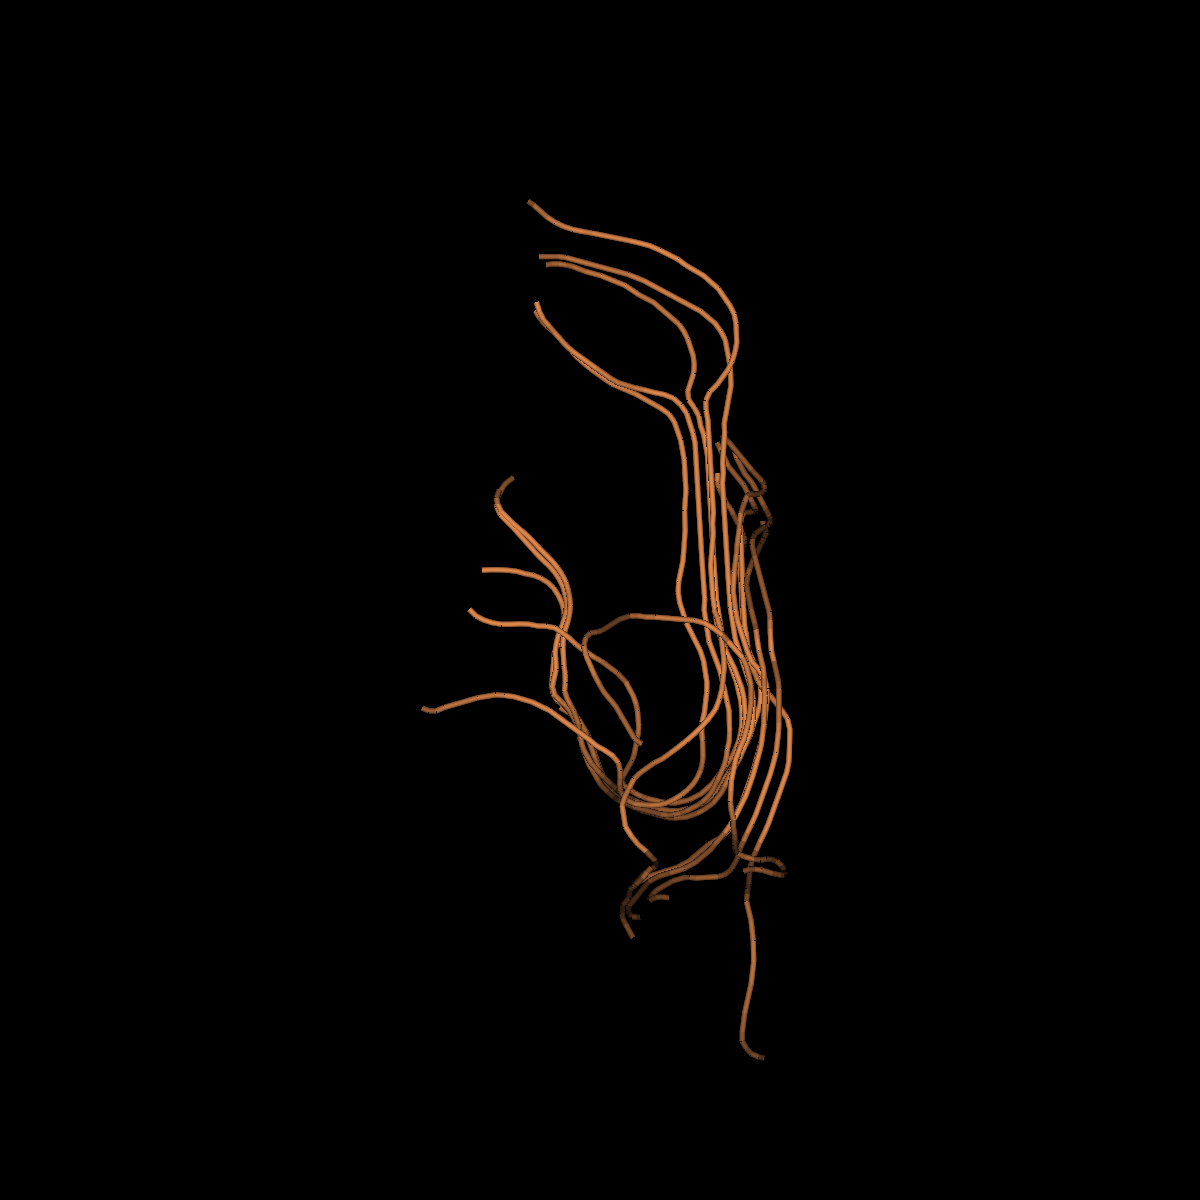

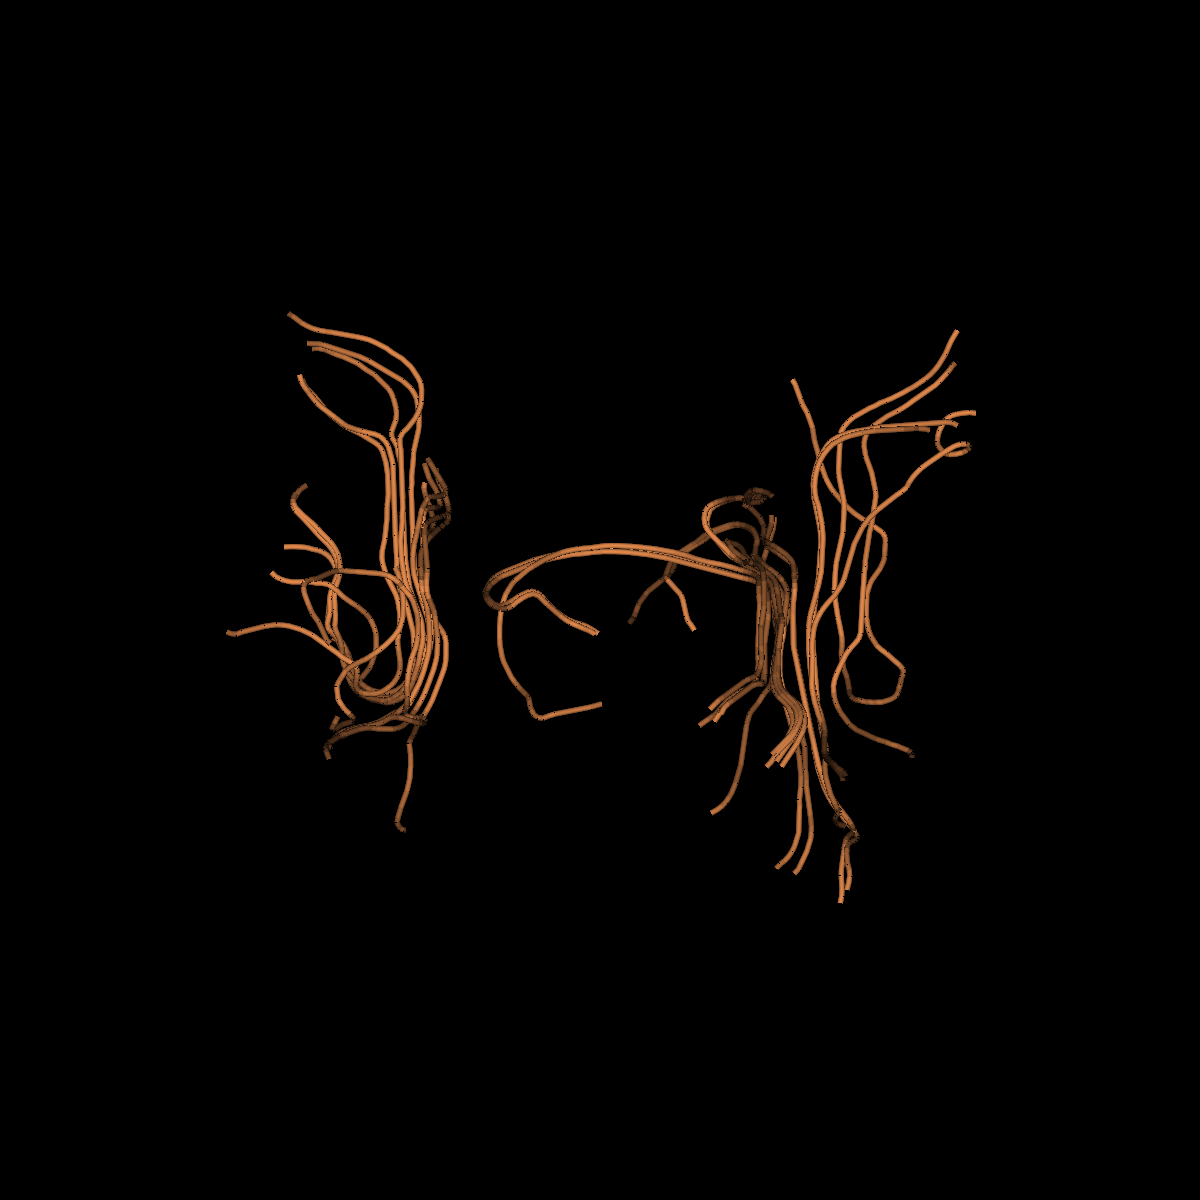

In [38]:
ren = afv.visualize_bundles(myafq.bundles[0], bundle=myafq.bundle_dict['SLF_L']['uid'], interact=False)
ren = afv.visualize_bundles(myafq.bundles[0], bundle=myafq.bundle_dict['SLF_R']['uid'], ren=ren, interact=False)
#ren = afv.visualize_roi(myafq.bundle_dict['SLF_L']['ROIs'][2], ren=ren, interact=True);

In [22]:
debug

ERROR:root:No traceback has been produced, nothing to debug.


In [23]:
import nibabel as nib 
trk = nib.streamlines.load(myafq.clean_bundles[0])

In [24]:
trk.header

{'magic_number': b'TRACK',
 'dimensions': array([1, 1, 1], dtype=int16),
 'voxel_sizes': array([1., 1., 1.], dtype=float32),
 'origin': array([0., 0., 0.], dtype=float32),
 'nb_scalars_per_point': 0,
 'scalar_name': array([b'', b'', b'', b'', b'', b'', b'', b'', b'', b''], dtype='|S20'),
 'nb_properties_per_streamline': 1,
 'property_name': array([b'bundle', b'', b'', b'', b'', b'', b'', b'', b'', b''],
       dtype='|S20'),
 'voxel_to_rasmm': array([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]], dtype=float32),
 'reserved': b'',
 'voxel_order': b'RAS',
 'pad2': b'',
 'image_orientation_patient': array([0., 0., 0., 0., 0., 0.], dtype=float32),
 'pad1': b'',
 'invert_x': b'',
 'invert_y': b'',
 'invert_z': b'',
 'swap_xy': b'',
 'swap_yz': b'',
 'swap_zx': b'',
 'nb_streamlines': 54,
 'version': 2,
 'hdr_size': 1000,
 'endianness': '<',
 '_offset_data': 1000}

In [25]:
trk.streamlines[0]

array([[ -2.2865868, -33.118587 ,  48.39422  ],
       [ -3.0748844, -32.64483  ,  48.78682  ],
       [ -3.8997364, -32.323006 ,  49.25164  ],
       [ -4.758997 , -31.943165 ,  49.594257 ],
       [ -5.674267 , -31.541239 ,  49.621063 ],
       [ -6.4614296, -31.059185 ,  49.236324 ],
       [ -7.1615314, -30.519138 ,  48.769215 ],
       [ -7.7602577, -30.014988 ,  48.14682  ],
       [ -8.358974 , -29.510847 ,  47.52443  ],
       [ -8.957701 , -29.006706 ,  46.902046 ],
       [ -9.559116 , -28.408638 ,  46.372307 ],
       [-10.160532 , -27.81057  ,  45.84258  ],
       [-10.938425 , -27.51637  ,  45.287292 ],
       [-11.786861 , -27.705599 ,  44.79299  ],
       [-12.5787735, -28.140684 ,  44.364517 ],
       [-13.355932 , -28.669687 ,  44.023693 ],
       [-14.047375 , -29.256702 ,  43.602577 ],
       [-14.714222 , -29.561954 ,  42.92277  ],
       [-15.217714 , -29.585434 ,  42.059097 ],
       [-15.721207 , -29.608913 ,  41.19542  ],
       [-16.13947  , -29.480463 ,  40.29

In [26]:
len(trk.streamlines)

54

In [27]:
import nibabel as nib

In [28]:
dti_params = nib.load(myafq.dti[0])

In [29]:
dti_params.affine

array([[  -1.25,    0.  ,    0.  ,   90.  ],
       [   0.  ,    1.25,    0.  , -126.  ],
       [   0.  ,    0.  ,    1.25,  -72.  ],
       [   0.  ,    0.  ,    0.  ,    1.  ]])

In [30]:
myafq.dwi_affine[0]

array([[  -1.25,    0.  ,    0.  ,   90.  ],
       [   0.  ,    1.25,    0.  , -126.  ],
       [   0.  ,    0.  ,    1.25,  -72.  ],
       [   0.  ,    0.  ,    0.  ,    1.  ]])

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

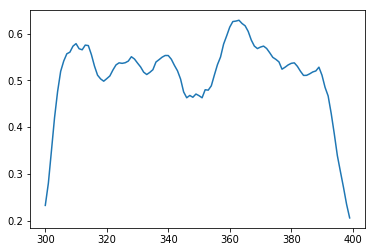

In [32]:
df = pd.read_csv(myafq.tract_profiles[0])
plt.plot(df[(df['scalar'] == "dti_fa") & (df['bundle']=="ARC_L")]['profiles'])

In [33]:
df['bundle'].unique()

array(['SLF_R', 'SLF_L', 'ARC_R', 'ARC_L', 'FP'], dtype=object)

In [34]:
df[df['bundle']=="CST_L"]

,Unnamed: 0,bundle,node,profiles,scalar


In [35]:
1000/60

16.666666666666668